# Insurance Pricing Forecast Using XGBoost Regressor

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


from ModelSelection import model_selection 


import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Display all output in a particular cell and not only the last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Dataset

In [3]:
df = pd.read_csv("insurance (1).csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- Dataset contains 1338 Enteries and 7 distinct features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Data contains 2 columns with float values
- Data contains 3 columns with categorical or object values
- Data contains 2 columns with integer values

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Exploratory Data Analysis

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- No misssing values in this dataset

In [8]:
x = df['sex'].value_counts()
x.values
x.index

array([676, 662], dtype=int64)

Index(['male', 'female'], dtype='object')

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x1d8a1154d60>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'male'),
  Text(0.018078568997005343, -1.0998514287589123, 'female')],
 [Text(-0.009861037634729992, 0.5999189611412249, '50.5%'),
  Text(0.009861037634730185, -0.5999189611412248, '49.5%')])

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x1d8a319a070>,
 [Text(-0.8801026332278259, 0.6598631335250117, 'no'),
  Text(0.8801026332278258, -0.6598631335250118, 'yes')],
 [Text(-0.48005598176063224, 0.3599253455590972, '79.5%'),
  Text(0.48005598176063213, -0.3599253455590973, '20.5%')])

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x1d8a31e3280>,
 [Text(0.722119686055283, 0.8297850077046582, 'southeast'),
  Text(-0.8627681631663758, 0.6823716704454532, 'northwest'),
  Text(-0.7201694244483215, -0.8314782018127556, 'southwest'),
  Text(0.7967551940047443, -0.7584069889092945, 'northeast')],
 [Text(0.39388346512106337, 0.4526100042025408, '27.2%'),
  Text(-0.47060081627256856, 0.37220272933388354, '24.3%'),
  Text(-0.3928196860627208, -0.45353356462513933, '24.3%'),
  Text(0.4345937421844059, -0.41367653940506965, '24.2%')])

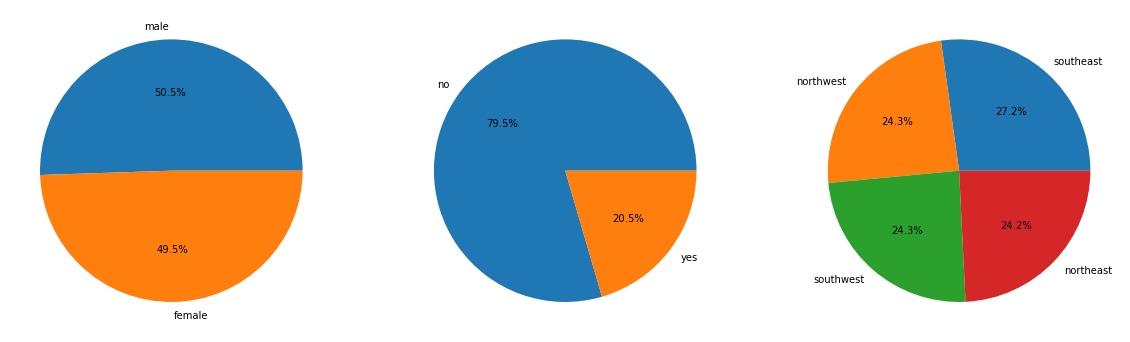

In [9]:
features = ['sex', 'smoker', 'region']

fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor('white')
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    
    x = df[col].value_counts()
    plt.pie(x.values, labels = x.index, autopct='%1.1f%%')
    
plt.show()

- The data is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.

In [10]:
df.groupby('sex').mean()
df.groupby('sex').mean()['charges']

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

<AxesSubplot:>

<AxesSubplot:xlabel='sex'>

<AxesSubplot:>

<AxesSubplot:xlabel='children'>

<AxesSubplot:>

<AxesSubplot:xlabel='smoker'>

<AxesSubplot:>

<AxesSubplot:xlabel='region'>

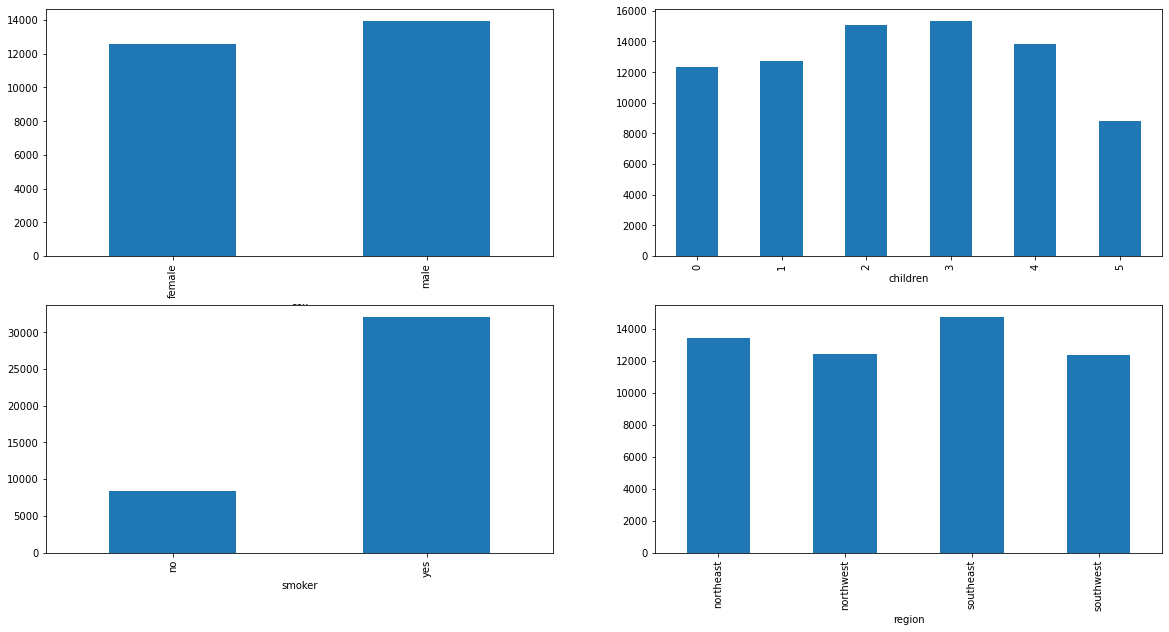

In [11]:
features = ['sex', 'children', 'smoker', 'region']
 
fig = plt.figure(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

- Charges are on the higher side for males as compared to females but the difference is not that much.
- Premium charged from the smoker is around thrice that which is charged from non-smokers.
- Charges are approximately the same in the given four regions.

<AxesSubplot:>

<AxesSubplot:xlabel='age', ylabel='charges'>

<AxesSubplot:>

<AxesSubplot:xlabel='bmi', ylabel='charges'>

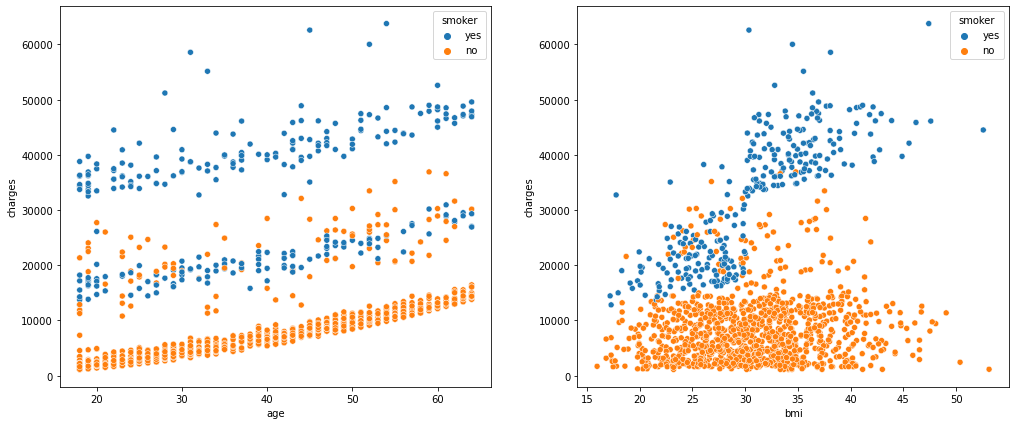

In [12]:
features = ['age', 'bmi']
 
fig = plt.figure(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker')
plt.show()

A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.

### Data Processing

##### Checking for Duplicates

In [13]:
duplicates = df[df.duplicated()]
duplicates

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
df.drop_duplicates(inplace = True)

In [15]:
## check duplicates again
duplicates_check = df[df.duplicated()]
duplicates_check

,age,sex,bmi,children,smoker,region,charges


##### Checking Dispersion of Data

<AxesSubplot:xlabel='age'>

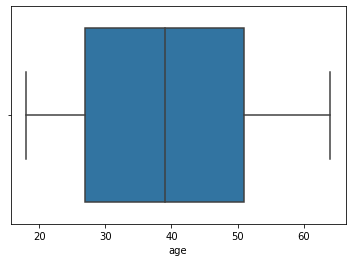

In [16]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='bmi'>

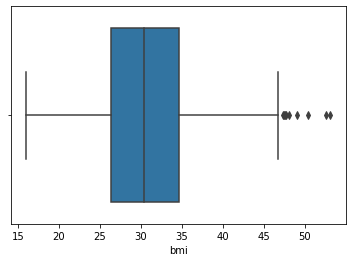

In [17]:
sns.boxplot(df['bmi'])

- To address the presence of outliers in the "bmi" column, we should handle them by replacing the outlier values with the mean value. This is necessary because the "bmi" column contains continuous data.

In [18]:
df['bmi'].quantile([0.25, 0.5, 0.75])

0.25    26.29
0.50    30.40
0.75    34.70
Name: bmi, dtype: float64

In [19]:
interquartile = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25) # Q3 - Q1

lower_outlier_limit = df['bmi'].quantile(0.25) - (1.5 * interquartile)
upper_outlier_limit = df['bmi'].quantile(0.75) + (1.5 * interquartile)

lower_outlier_limit
upper_outlier_limit

13.674999999999994

47.31500000000001

In [20]:
# Capping the outlier values i.e bringing them to the lower and upper outlier limit
df.loc[df['bmi'] < lower_outlier_limit, 'bmi'] = lower_outlier_limit
df.loc[df['bmi'] > upper_outlier_limit, 'bmi'] = upper_outlier_limit

#Alternatively using feature_engine library
# from feature_engine.outliers import ArbitraryOutlierCapper
# arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
# df[['bmi']]=arb.fit_transform(df[['bmi']])
# sns.boxplot(df['bmi'])

<AxesSubplot:xlabel='bmi'>

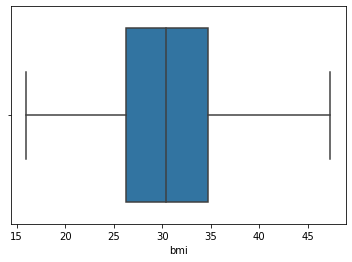

In [21]:
sns.boxplot(df['bmi'])

#### Encoding

- Encoding is to be done for discrete categorical data (sex,smoker,region).

In [22]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


- The discrete data has been encoded, and the process of preparing and refining the data is finished. We are now ready to move on to building the model.

In [24]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


### Model Development

In [25]:
X = df.drop(['charges'],axis=1)
y = df[['charges']]

###### LinearRegression()

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(Xtrain, ytrain)
print(lrmodel.score(Xtrain,ytrain))
print(lrmodel.score(Xtest,ytest))
print(cross_val_score(lrmodel, X, y, cv=5).mean())

LinearRegression()

0.7295415541376445
0.8062391115570589
0.7470697972809902


###### SVR()

In [27]:
svrmodel=SVR()
svrmodel.fit(Xtrain, ytrain)
ypredtrain1=svrmodel.predict(Xtrain)
ypredtest1=svrmodel.predict(Xtest)
print(r2_score(ypredtrain1, ytrain))
print(r2_score(ypredtest1, ytest))
print(cross_val_score(svrmodel, X, y, cv=5).mean())

SVR()

-23774.40412212514
-32345.423540931948
-0.10374591327267262


###### RandomForest()

In [29]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(Xtrain, ytrain)
ypredtrain2 = rfmodel.predict(Xtrain)
ypredtest2 = rfmodel.predict(Xtest)
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))
print(cross_val_score(rfmodel, X, y, cv=5,).mean())


estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(Xtrain,ytrain)
print(grid.best_params_)

RandomForestRegressor(random_state=42)

0.9738163260247533
0.8819423353068565
0.8363637309718952


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [10, 40, 50, 98, 100, 120, 150]},
             scoring='r2')

{'n_estimators': 120}


In [31]:
rfmodel=RandomForestRegressor(random_state=42, n_estimators=120)
rfmodel.fit(Xtrain,ytrain)
ypredtrain2=rfmodel.predict(Xtrain)
ypredtest2=rfmodel.predict(Xtest)
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))
print(cross_val_score(rfmodel,X,y,cv=5).mean())

RandomForestRegressor(n_estimators=120, random_state=42)

0.9746383984429655
0.8822009842175969
0.8367438097052858


###### GradientBoosting

In [32]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(Xtrain,ytrain)
ypredtrain3=gbmodel.predict(Xtrain)
ypredtest3=gbmodel.predict(Xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,y,cv=5).mean())

estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(Xtrain,ytrain)
print(grid.best_params_)

GradientBoostingRegressor()

0.8931345821166041
0.9042552707052232
0.8549598587976664


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.19, 0.2, 0.21, 0.8, 1],
                         'n_estimators': [10, 15, 19, 20, 21, 50]},
             scoring='r2')

{'learning_rate': 0.2, 'n_estimators': 19}


In [33]:
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(Xtrain,ytrain)
ypredtrain3=gbmodel.predict(Xtrain)
ypredtest3=gbmodel.predict(Xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,y,cv=5,).mean())

GradientBoostingRegressor(learning_rate=0.2, n_estimators=19)

0.8682397447116926
0.9017109716082662
0.8606041910125791


###### XGB

In [34]:
xgmodel=XGBRegressor()
xgmodel.fit(Xtrain,ytrain)
ypredtrain4=xgmodel.predict(Xtrain)
ypredtest4=xgmodel.predict(Xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5,).mean())

estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(Xtrain,ytrain)
print(grid.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

0.9944530188818493
0.8618686915522016
0.8104424308304893


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

{'gamma': 0, 'max_depth': 3, 'n_estimators': 15}


In [35]:
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(Xtrain, ytrain)
ypredtrain4=xgmodel.predict(Xtrain)
ypredtest4=xgmodel.predict(Xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5,).mean())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=15, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

0.870691899927822
0.904151903449132
0.8600710679082143


- From the above table we can observe that XGBoost is the best model.Now we need to identify the important features for predicting of charges.

In [36]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.050547
sex,0.002721
bmi,0.092197
children,0.013500
smoker,0.834279
region,0.006756


In [37]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.050547
bmi,0.092197
children,0.013500
smoker,0.834279


#### Final Model

In [ ]:
Xf=df.drop(['charges', 'sex','region'],axis=1)
y=df[['charges']]

In [41]:
Xtrain,Xtest,ytrain,ytest=train_test_split(Xf,y,test_size=0.2,random_state=42)

finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(Xtrain, ytrain)

ypredtrain5=finalmodel.predict(Xtrain)
ypredtest5=finalmodel.predict(Xtest)
print(r2_score(ytrain,ypredtrain5))
print(r2_score(ytest,ypredtest5))
print(cross_val_score(finalmodel,X,y,cv=5,).mean())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=15, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

0.8685330377072453
0.9019690386148037
0.8596087656497564


#### Save Model

In [42]:
from pickle import dump
dump(finalmodel, open('insurancemodelf.pkl','wb'))

# Test saved model
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([17483.12], dtype=float32)

Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.

The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the premium charged from the buyers.